In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("path_to_crime_dataset.csv")

df.head()

,State,AMI%,SMI%,DrugUse%,ViolentCrimePer100k,FacilitiesCount,MHClients,Population,Facilities_per_100k
0,Alaska,25.2,6.8,17.5,837,54,6000,733391,7.36
1,California,20.5,4.8,15.0,442,630,50000,39538223,1.59
2,Florida,19.3,4.1,14.2,384,420,43000,21538187,1.95
3,New Mexico,22.1,5.6,18.9,778,73,7800,2117522,3.45
4,Oregon,26.7,7.2,19.1,292,110,10500,4237256,2.60


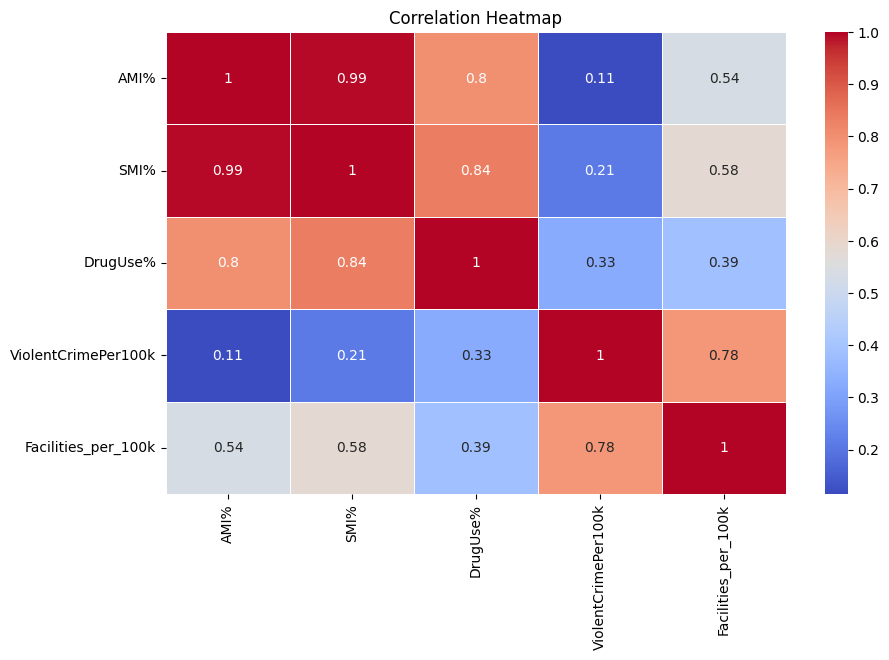

In [15]:
plt.figure(figsize=(10, 6))
corr = df[['AMI%', 'SMI%', 'DrugUse%', 'ViolentCrimePer100k', 'Facilities_per_100k']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

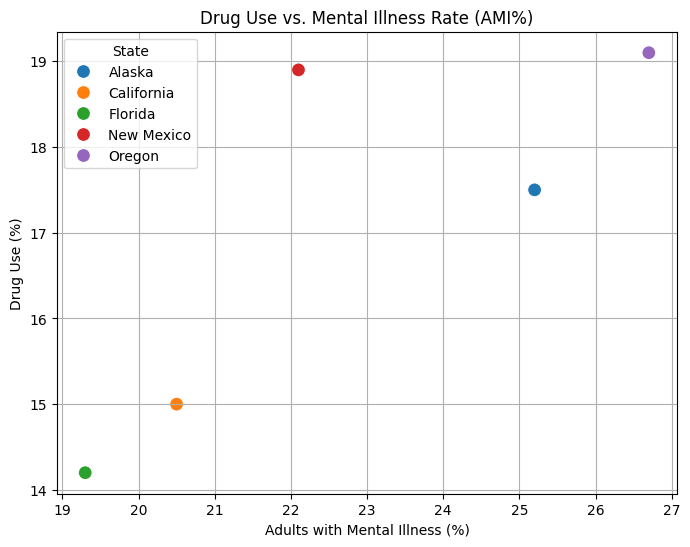

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AMI%', y='DrugUse%', hue='State', s=100)
plt.title('Drug Use vs. Mental Illness Rate (AMI%)')
plt.xlabel('Adults with Mental Illness (%)')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.show()

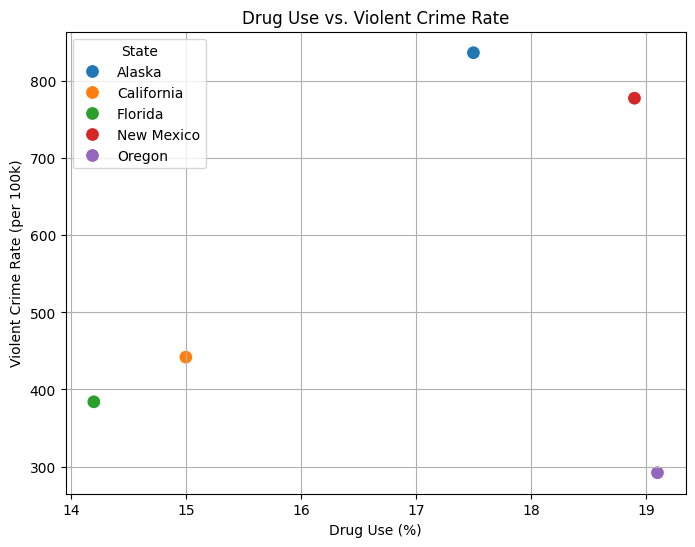

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DrugUse%', y='ViolentCrimePer100k', hue='State', s=100)
plt.title('Drug Use vs. Violent Crime Rate')
plt.xlabel('Drug Use (%)')
plt.ylabel('Violent Crime Rate (per 100k)')
plt.grid(True)
plt.show()

<ipython-input-18-6d7890af3185>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Facilities_per_100k', data=df, palette='viridis')


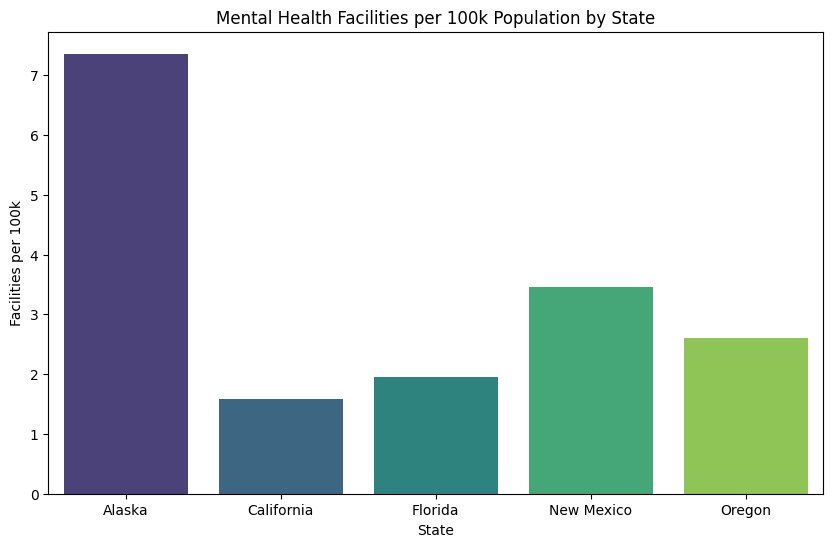

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Facilities_per_100k', data=df, palette='viridis')
plt.title('Mental Health Facilities per 100k Population by State')
plt.xlabel('State')
plt.ylabel('Facilities per 100k')
plt.show()